#Blind 75 LeetCode Questions

##***7. Dynamic Programming (11 Questions)***

***1. Climbing Stairs***

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?



Example 1:

Input: n = 2

Output: 2

Explanation: There are two ways to climb to the top.
1. 1 step + 1 step
2. 2 steps

Example 2:

Input: n = 3

Output: 3

Explanation: There are three ways to climb to the top.
1. 1 step + 1 step + 1 step
2. 1 step + 2 steps
3. 2 steps + 1 step


Constraints:

1 <= n <= 45

In [ ]:
class Solution:
  def climbStairs(self, n: int) -> int:
    one, two = 1, 1

    for i in range(n - 1):
      temp = one
      one = one + two
      two = temp

    return one

***2. Coin Change***

You are given an integer array coins representing coins of different denominations and an integer amount representing a total amount of money.

Return the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

You may assume that you have an infinite number of each kind of coin.



Example 1:

Input: coins = [1,2,5], amount = 11

Output: 3

Explanation: 11 = 5 + 5 + 1

Example 2:

Input: coins = [2], amount = 3

Output: -1

Example 3:

Input: coins = [1], amount = 0

Output: 0


Constraints:

1 <= coins.length <= 12
1 <= coins[i] <= 231 - 1
0 <= amount <= 104

In [ ]:
from typing import List

class Solution:
  def coinChange(self, coins: List[int], amount: int) -> int:
    dp = [amount + 1] * (amount + 1) # 0...up to amount
    dp[0] = 0

    for a in range(1, amount + 1):
      for c in coins:
        if a - c >= 0:
          dp[a] = min(dp[a], 1 + dp[a - c])

    return dp[amount] if dp[amount] != amount + 1 else -1

***3. Longest Increasing Subsequence***

Given an integer array nums, return the length of the longest strictly increasing
subsequence
.



Example 1:

Input: nums = [10,9,2,5,3,7,101,18]

Output: 4

Explanation: The longest increasing subsequence is [2,3,7,101], therefore the length is 4.

Example 2:

Input: nums = [0,1,0,3,2,3]

Output: 4

Example 3:

Input: nums = [7,7,7,7,7,7,7]

Output: 1


Constraints:

1 <= nums.length <= 2500
-104 <= nums[i] <= 104


Follow up: Can you come up with an algorithm that runs in O(n log(n)) time complexity?

In [ ]:
from typing import List

class Solution:
  def lengthOfLIS(self, nums: List[int]) -> int:
    LIS = [1] * len(nums)

    for i in range(len(nums) - 1, -1, -1):
      for j in range(i + 1, len(nums)):
        if nums[i] < nums[j]:
          LIS[i] = max(LIS[i], 1 + LIS[j])

    return max(LIS)

***4. Longest Common Subsequence***

Given two strings text1 and text2, return the length of their longest common subsequence. If there is no common subsequence, return 0.

A subsequence of a string is a new string generated from the original string with some characters (can be none) deleted without changing the relative order of the remaining characters.

For example, "ace" is a subsequence of "abcde".
A common subsequence of two strings is a subsequence that is common to both strings.



Example 1:

Input: text1 = "abcde", text2 = "ace"

Output: 3  

Explanation: The longest common subsequence is "ace" and its length is 3.

Example 2:

Input: text1 = "abc", text2 = "abc"

Output: 3

Explanation: The longest common subsequence is "abc" and its length is 3.

Example 3:

Input: text1 = "abc", text2 = "def"

Output: 0

Explanation: There is no such common subsequence, so the result is 0.


Constraints:

1 <= text1.length, text2.length <= 1000
text1 and text2 consist of only lowercase English characters.

In [ ]:
class Solution:
  def longestCommonSubsequence(self, text1: str, text2: str) -> int:
    dp = [[0 for j in range(len(text2) + 1)] for i in range(len(text1) + 1)]

    for i in range(len(text1) - 1, -1, -1):
      for j in range(len(text2) -1, -1, -1):
        if text1[i] == text2[j]:
          dp[i][j] = 1 + dp[i + 1][j + 1]
        else:
          dp[i][j] = max(dp[i][j + 1], dp[i + 1][j])

    return dp[0][0]

***5. Word Break***

Given a string s and a dictionary of strings wordDict, return true if s can be segmented into a space-separated sequence of one or more dictionary words.

Note that the same word in the dictionary may be reused multiple times in the segmentation.



Example 1:

Input: s = "leetcode", wordDict = ["leet","code"]

Output: true

Explanation: Return true because "leetcode" can be segmented as "leet code".

Example 2:

Input: s = "applepenapple", wordDict = ["apple","pen"]

Output: true

Explanation: Return true because "applepenapple" can be segmented as "apple pen apple".

Note that you are allowed to reuse a dictionary word.

Example 3:

Input: s = "catsandog", wordDict = ["cats","dog","sand","and","cat"]

Output: false


Constraints:

1 <= s.length <= 300
1 <= wordDict.length <= 1000
1 <= wordDict[i].length <= 20
s and wordDict[i] consist of only lowercase English letters.
All the strings of wordDict are unique.

In [1]:
from typing import List

class Solution:
  def wordBreak(self, s: str, wordDict: List[str]) -> bool:

    dp = [False] * (len(s) + 1)
    dp[len(s)] = True

    for i in range(len(s) - 1, -1, -1):
      for w in wordDict:
        if (i + len(w)) <= len(s) and s[i : i + len(w)] == w:
          dp[i] = dp[i + len(w)]
        if dp[i]:
          break

    return dp[0]

***6. Combination Sum***

Given an array of distinct integers candidates and a target integer target, return a list of all unique combinations of candidates where the chosen numbers sum to target. You may return the combinations in any order.

The same number may be chosen from candidates an unlimited number of times. Two combinations are unique if the
frequency
 of at least one of the chosen numbers is different.

The test cases are generated such that the number of unique combinations that sum up to target is less than 150 combinations for the given input.



Example 1:

Input: candidates = [2,3,6,7], target = 7

Output: [[2,2,3],[7]]

Explanation:
2 and 3 are candidates, and 2 + 2 + 3 = 7. Note that 2 can be used multiple times.
7 is a candidate, and 7 = 7.
These are the only two combinations.

Example 2:

Input: candidates = [2,3,5], target = 8

Output: [[2,2,2,2],[2,3,3],[3,5]]

Example 3:

Input: candidates = [2], target = 1

Output: []


Constraints:

1 <= candidates.length <= 30
2 <= candidates[i] <= 40
All elements of candidates are distinct.
1 <= target <= 40

In [2]:
from typing import List

class Solution:
  def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:
    res = []

    def dfs(i, cur, total):
      if total == target:
        res.append(cur.copy())
        return
      if i >= len(candidates) or total > target:
        return

      cur.append(candidates[i])
      dfs(i, cur, total + candidates[i])
      cur.pop()
      dfs(i + 1, cur, total)

    dfs(0, [], 0)
    return res

***7. House Robber***

You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security systems connected and it will automatically contact the police if two adjacent houses were broken into on the same night.

Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police.



Example 1:

Input: nums = [1,2,3,1]

Output: 4

Explanation: Rob house 1 (money = 1) and then rob house 3 (money = 3).
Total amount you can rob = 1 + 3 = 4.

Example 2:

Input: nums = [2,7,9,3,1]

Output: 12

Explanation: Rob house 1 (money = 2), rob house 3 (money = 9) and rob house 5 (money = 1).

Total amount you can rob = 2 + 9 + 1 = 12.


Constraints:

1 <= nums.length <= 100
0 <= nums[i] <= 400

In [ ]:
from typing import List

class Solution:
  def rob(self, nums: List[int]) -> int:
    rob1, rob2 = 0, 0

    # [rob1, rob2, n, n+1, ...]
    for n in nums:
      temp = max(n + rob1, rob2)
      rob1 = rob2
      rob2 = temp
    return rob2

***8. House Robber II***

You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed. All houses at this place are arranged in a circle. That means the first house is the neighbor of the last one. Meanwhile, adjacent houses have a security system connected, and it will automatically contact the police if two adjacent houses were broken into on the same night.

Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police.



Example 1:

Input: nums = [2,3,2]

Output: 3

Explanation: You cannot rob house 1 (money = 2) and then rob house 3 (money = 2), because they are adjacent houses.

Example 2:

Input: nums = [1,2,3,1]

Output: 4

Explanation: Rob house 1 (money = 1) and then rob house 3 (money = 3).
Total amount you can rob = 1 + 3 = 4.

Example 3:

Input: nums = [1,2,3]

Output: 3


Constraints:

1 <= nums.length <= 100
0 <= nums[i] <= 1000

In [4]:
from typing import List

class Solution:
  def rob(self, nums: List[int]) -> int:
    return max(nums[0], self.helper(nums[1:]), self.helper(nums[:-1]))

  def helper(self, nums):
    rob1, rob2 = 0, 0

    for n in nums:
      newRob = max(rob1 + n, rob2)
      rob1 = rob2
      rob2 = newRob
    return rob2

***9. Decode Ways***

A message containing letters from A-Z can be encoded into numbers using the following mapping:

'A' -> "1"
'B' -> "2"
...
'Z' -> "26"
To decode an encoded message, all the digits must be grouped then mapped back into letters using the reverse of the mapping above (there may be multiple ways). For example, "11106" can be mapped into:

"AAJF" with the grouping (1 1 10 6)
"KJF" with the grouping (11 10 6)
Note that the grouping (1 11 06) is invalid because "06" cannot be mapped into 'F' since "6" is different from "06".

Given a string s containing only digits, return the number of ways to decode it.

The test cases are generated so that the answer fits in a 32-bit integer.



Example 1:

Input: s = "12"

Output: 2

Explanation: "12" could be decoded as "AB" (1 2) or "L" (12).

Example 2:

Input: s = "226"

Output: 3

Explanation: "226" could be decoded as "BZ" (2 26), "VF" (22 6), or "BBF" (2 2 6).

Example 3:

Input: s = "06"

Output: 0

Explanation: "06" cannot be mapped to "F" because of the leading zero ("6" is different from "06").


Constraints:

1 <= s.length <= 100
s contains only digits and may contain leading zero(s).

In [11]:
class Solution:
  def numDecodings(self, s: str) ->int:
    # DP - Bottom Up Approach

    dp = { len(s) : 1}

    for i in range(len(s) - 1, -1, -1):
      if s[i] == "0":
        dp[i] = 0
      else:
        dp[i] == dp[i + 1]

      if (i + 1 < len(s) and (s[i] == "1" or
          s[i] == "2" and s[i + 1] in "0123456")):
          dp[i] += dp[i + 2]
    return dp[0]

In [10]:
class Solution:
  def numDecodings(self, s: str) ->int:
    # DFS approach

    dp = { len(s) : 1 }

    def dfs(i):
      if i in dp:
        return dp[i]
      if s[i] == "0":
        return 0

      res = dfs(i + 1)
      if (i + 1 < len(s) and (s[i] == "1" or
          s[i] == "2" and s[i + 1] in "0123456")):
          res += dfs(i + 2)
      dp[i] = res

    return dfs(0)

***10. Unique Paths***

There is a robot on an m x n grid. The robot is initially located at the top-left corner (i.e., grid[0][0]). The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]). The robot can only move either down or right at any point in time.

Given the two integers m and n, return the number of possible unique paths that the robot can take to reach the bottom-right corner.

The test cases are generated so that the answer will be less than or equal to 2 * 109.



Example 1:

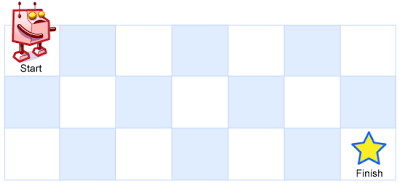

Input: m = 3, n = 7
Output: 28

Example 2:

Input: m = 3, n = 2

Output: 3

Explanation: From the top-left corner, there are a total of 3 ways to reach the bottom-right corner:

1. Right -> Down -> Down
2. Down -> Down -> Right
3. Down -> Right -> Down


Constraints:

1 <= m, n <= 100

In [ ]:
class Solution:
  def uniquePaths(self, m: int, n: int) -> int:
    row = [1] * n

    for i in range(m - 1):
      newRow = [1] * n
      for j in range(n - 2, -1, -1):
        newRow[j] = newRow[j + 1] + row[j] # right cell + bottom cell
      row = newRow
    return row[0]

***11. Jump Game***

You are given an integer array nums. You are initially positioned at the array's first index, and each element in the array represents your maximum jump length at that position.

Return true if you can reach the last index, or false otherwise.



Example 1:

Input: nums = [2,3,1,1,4]

Output: true

Explanation: Jump 1 step from index 0 to 1, then 3 steps to the last index.

Example 2:

Input: nums = [3,2,1,0,4]

Output: false

Explanation: You will always arrive at index 3 no matter what. Its maximum jump length is 0, which makes it impossible to reach the last index.


Constraints:

1 <= nums.length <= 104
0 <= nums[i] <= 105

In [12]:
from typing import List

class Solution:
  def canJump(self, nums: List[int]) -> bool:
    goal = len(nums) - 1

    for i in range(len(nums) - 1, -1, -1):
      if i + nums[i] >= goal:
        goal = i

    return True if goal == 0 else False